### Module 14 - Case study 3

1.The data file contains numerical attributes that describe a letter and its corresponding class. Read the datafile “letterCG.data” and set all the numerical attributes as features. Split the data in to train and test sets.

2.Fit a sequence of AdaBoostClassifier with varying number of weak learners ranging from 1 to 16, keeping the max_depth as 1. Plot the accuracy on test set against the number of weak learners. Use decision tree classifier as the base classifier.

3.Repeat step2 with max_depth set as 2.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##### 1. The data file contains numerical attributes that describe a letter and its corresponding class. Read the datafile “letterCG.data” and set all the numerical attributes as features. Split the data in to train and test sets.

In [11]:
df = pd.read_csv(r'D:\E\Courses\Edureka\Assignments\Dataset\14. Model Selection and Boosting\letterCG.bin', delimiter=' ')

In [12]:
print(df.shape)
df.head(2)

(1509, 19)


,Class,x-box,y-box,width,high,Unnamed: 5,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,Unnamed: 18
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9,NaN,NaN
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7,NaN,NaN


In [13]:
df.isna().sum()

Class             0
x-box             0
y-box             0
width             0
high              0
Unnamed: 5        0
onpix             0
x-bar             0
y-bar             0
x2bar             0
y2bar             0
xybar             0
x2ybr             0
xy2br             0
x-ege             0
xegvy             0
y-ege             0
yegvx          1509
Unnamed: 18    1509
dtype: int64

In [18]:
x = df.iloc[:, 1:17].values
y = df.iloc[:, 0].values

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [20]:
y

array([0, 0, 1, ..., 1, 0, 0])

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [22]:
len(x_train), len(x_test), len(y_train), len(y_test)

(1207, 302, 1207, 302)

##### 2. Fit a sequence of AdaBoostClassifier with varying number of weak learners ranging from 1 to 16, keeping the max_depth as 1. Plot the accuracy on test set against the number of weak learners. Use decision tree classifier as the base classifier.

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [28]:
num = [1,2,4,8,10,16]
scores ={}

In [41]:
from sklearn.metrics import accuracy_score

In [30]:
for num in n_estimators:
    clf= AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=num,learning_rate=1.5)
    clf = clf.fit(x_train,y_train)
    scores[num]=  clf.score(x_test,y_test)

In [31]:
scores

{1: 0.7748344370860927,
 2: 0.7980132450331126,
 4: 0.8543046357615894,
 8: 0.8642384105960265,
 10: 0.890728476821192,
 16: 0.9205298013245033}

In [34]:
scores.keys()

dict_keys([1, 2, 4, 8, 10, 16])

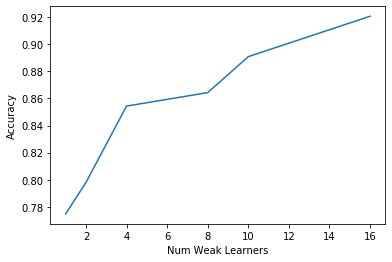

In [40]:
plt.plot(list(scores.keys()),list(scores.values()))
plt.xlabel("Num Weak Learners")
plt.ylabel("Accuracy")
plt.show()

##### 3. Repeat step2 with max_depth set as 2.

In [44]:
scores_2 = {}
acc_score_2 = {}

for num in n_estimators:
    clf= AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=num,learning_rate=1.5)
    clf = clf.fit(x_train,y_train)
    scores_2[num]=  clf.score(x_test,y_test)
    y_pred = clf.predict(x_test)
    acc_score_2[num] = accuracy_score(y_test, y_pred)

In [45]:
scores_2

{1: 0.8774834437086093,
 2: 0.9172185430463576,
 4: 0.9437086092715232,
 8: 0.956953642384106,
 10: 0.9635761589403974,
 16: 0.9701986754966887}

In [46]:
acc_score_2

{1: 0.8774834437086093,
 2: 0.9172185430463576,
 4: 0.9437086092715232,
 8: 0.956953642384106,
 10: 0.9635761589403974,
 16: 0.9701986754966887}